In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8, 6]

In [3]:
dogdata_w_mat = io.loadmat(os.path.join('Data','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('Data','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

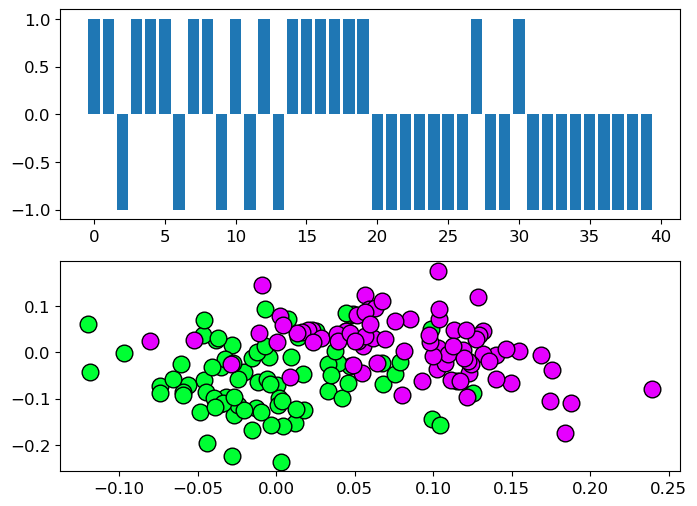

In [4]:
xtrain = np.concatenate((v[:60,np.array([1,3])],v[80:140,np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)
test = np.concatenate((v[60:80,np.array([1,3])],v[140:160,np.array([1,3])]))

lda = LinearDiscriminantAnalysis()
test_class = lda.fit(xtrain, label).predict(test)

truth = np.repeat(np.array([1,-1]),20)
E = 100*(1-np.sum(0.5*np.abs(test_class - truth))/40)

fig,axs = plt.subplots(2)
axs[0].bar(range(40),test_class)

axs[1].plot(v[:80,1],v[:80,3],'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
axs[1].plot(v[80:,1],v[80:,3],'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)

plt.show()

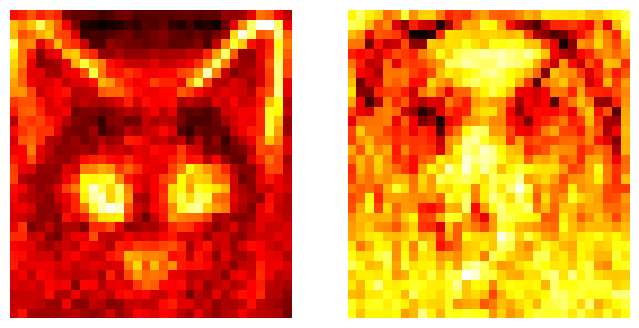

In [5]:
plt.rcParams['figure.figsize'] = [8,4]
fig,axs = plt.subplots(1,2)
for j in range(2):
    U3 = np.flipud(np.reshape(u[:,2*j+1],(32,32)))
    axs[j].pcolor(np.rot90(U3),cmap='hot')
    axs[j].axis('off')

In [6]:
dogdata_mat = io.loadmat(os.path.join('Data','dogData.mat'))
catdata_mat = io.loadmat(os.path.join('Data','catData.mat'))

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

CD = np.concatenate((dog,cat),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

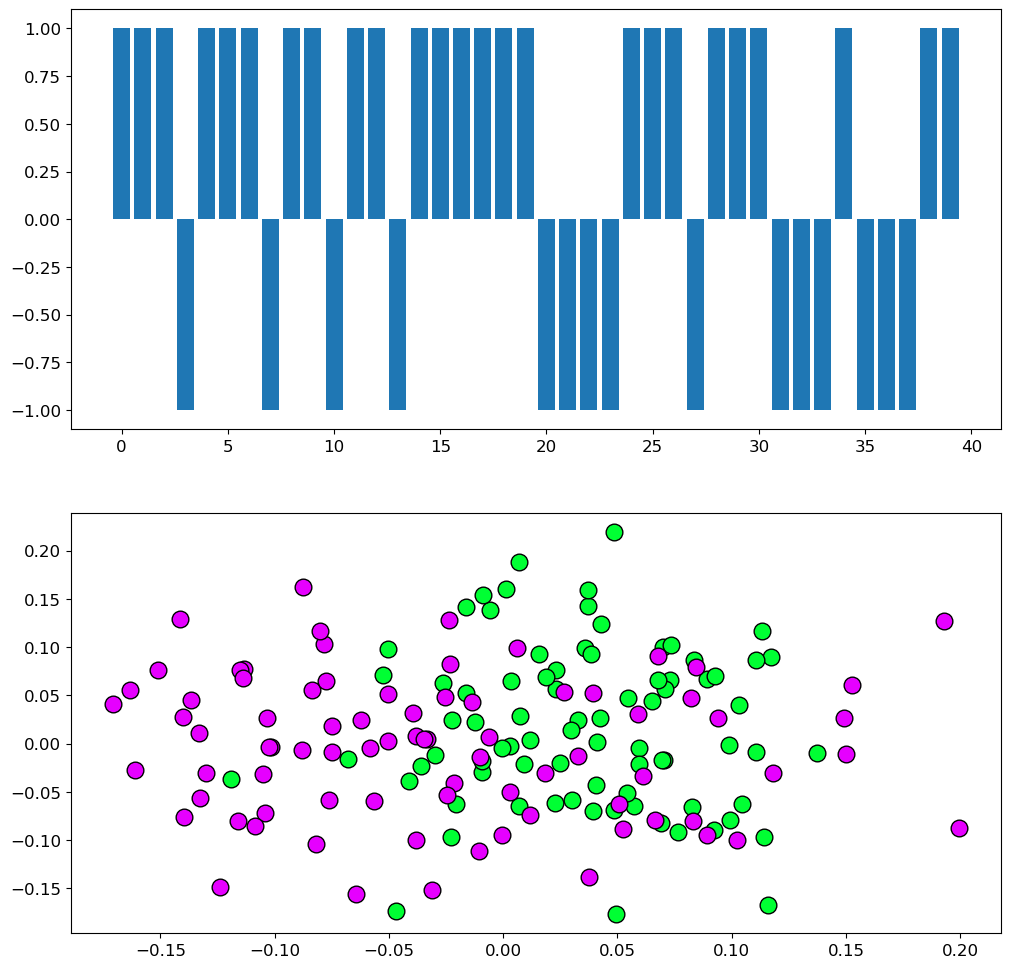

In [7]:
plt.rcParams['figure.figsize'] = [12, 12]
xtrain = np.concatenate((v[:60,np.array([1,3])],v[80:140,np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)
test = np.concatenate((v[60:80,np.array([1,3])],v[140:160,np.array([1,3])]))

lda = LinearDiscriminantAnalysis()
test_class = lda.fit(xtrain, label).predict(test)

fig,axs = plt.subplots(2)
axs[0].bar(range(40),test_class)

axs[1].plot(v[:80,1],v[:80,3],'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
axs[1].plot(v[80:,1],v[80:,3],'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)

plt.show()

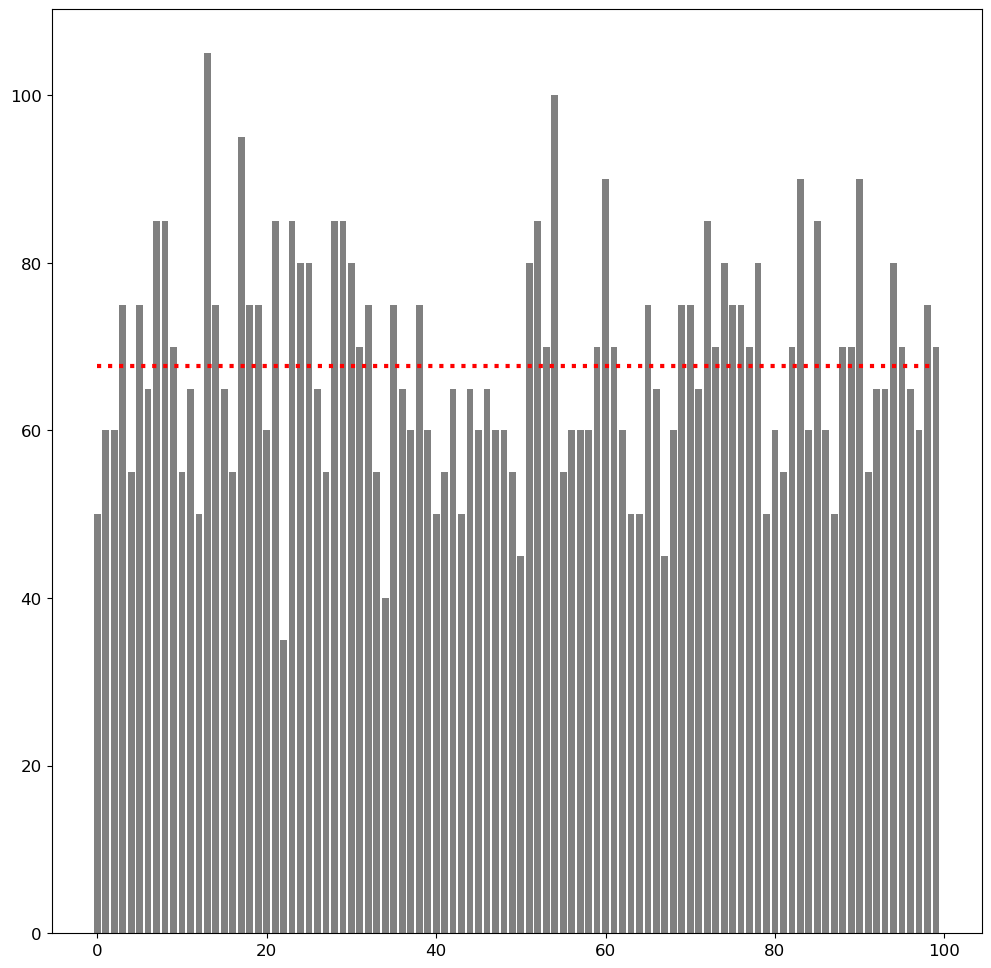

In [8]:
## Cross-validate
E = np.zeros(100)

for jj in range(100):
    r1 = np.random.permutation(80)
    r2 = np.random.permutation(80)
    ind1 = r1[:60]
    ind2 = r2[:60]+60
    ind1t = r1[60:80]
    ind2t = r2[60:80]+60
    
    xtrain = np.concatenate((v[ind1[:, np.newaxis],np.array([1,3])], v[ind2[:, np.newaxis],np.array([1,3])]))
    test = np.concatenate((v[ind1t[:, np.newaxis],np.array([1,3])], v[ind2t[:, np.newaxis],np.array([1,3])]))
    
    label = np.repeat(np.array([1,-1]),60)

    lda = LinearDiscriminantAnalysis()
    test_class = lda.fit(xtrain, label).predict(test)

    truth = np.repeat(np.array([1,-1]),20)
    E[jj] = 100*np.sum(np.abs(test_class-truth))/40
    
plt.bar(range(100),E,color=(0.5,0.5,0.5))
plt.plot(range(100),np.mean(E)*np.ones(100),'r:',linewidth=3)
plt.show()

In [9]:
dogdata_w_mat = io.loadmat(os.path.join('Data','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('Data','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

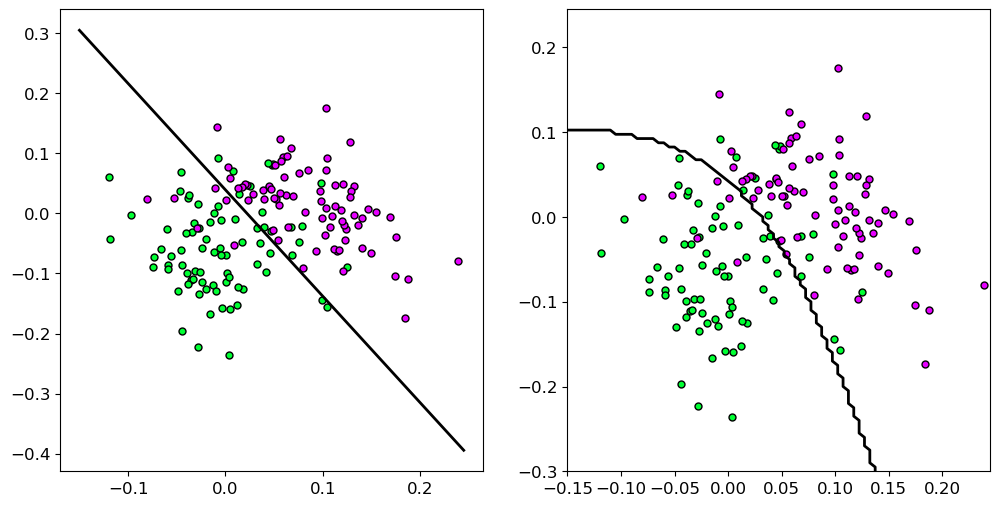

In [10]:
plt.rcParams['figure.figsize'] = [12, 6]
fig,axs = plt.subplots(1,2)
for j in range(2):
    axs[j].plot(v[:80,1],v[:80,3],'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=5)
    axs[j].plot(v[80:,1],v[80:,3],'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=5)

# Linear Discriminant
xtrain = np.concatenate((v[:60,np.array([1,3])],v[80:140,np.array([1,3])]))
test = np.concatenate((v[60:80,np.array([1,3])],v[140:160,np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)



lda = LinearDiscriminantAnalysis().fit(xtrain, label)
test_class = lda.predict(test)
K = -lda.intercept_[0]
L = -lda.coef_[0]


x = np.arange(-0.15,0.25,0.005)
axs[0].plot(x,-(L[0]*x+K)/L[1],'k',linewidth=2)


# Quadratic Discriminant
qda = QuadraticDiscriminantAnalysis().fit(xtrain, label)
y = np.arange(-0.3,0.25,0.005)
X,Y = np.meshgrid(x,y)

Z = np.zeros_like(X)

for jj in range(len(x)):
    for kk in range(len(y)):
        Z[kk,jj] = qda.predict(np.array([[x[jj],y[kk]]]))

axs[1].contour(X,Y,Z,0,colors='k',linewidths=2)        

plt.show()


## Support Vector Machine

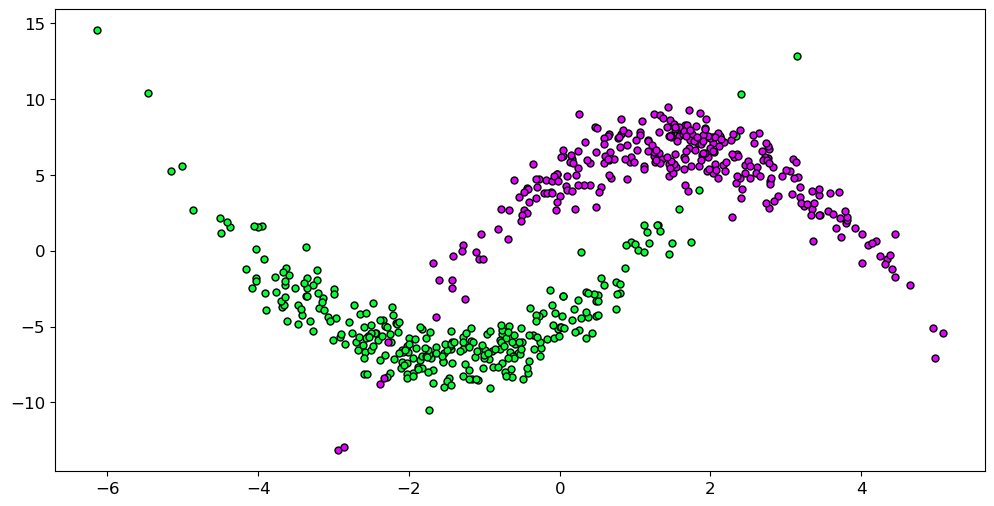

In [11]:
# Random ellipse 1

n1 = 300 # Training set size

x1 = 1.5*np.random.randn(n1) - 1.5
y1 = 1.2*np.random.randn(n1) + np.power(x1+1.5,2) - 7
x2 = 1.5*np.random.randn(n1) + 1.5
y2 = 1.2*np.random.randn(n1) - np.power(x2-1.5,2) + 7

plt.plot(x1,y1,'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=5)
plt.plot(x2,y2,'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=5)

plt.show()

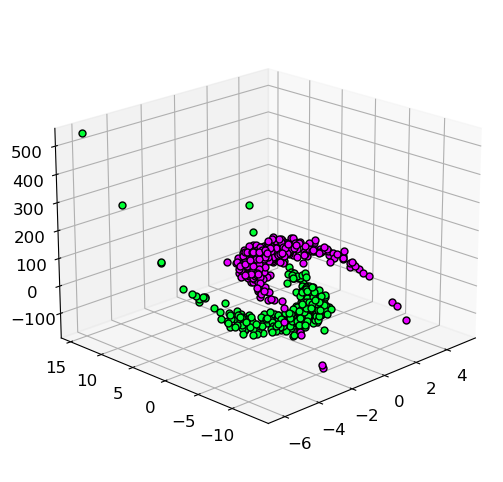

In [12]:
z1 = np.power(x1,2) * y1
z2 = np.power(x2,2) * y2

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x1,y1,z1,'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=5)
ax.plot(x2,y2,z2,'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=5)

ax.view_init(20, -135)

plt.show()

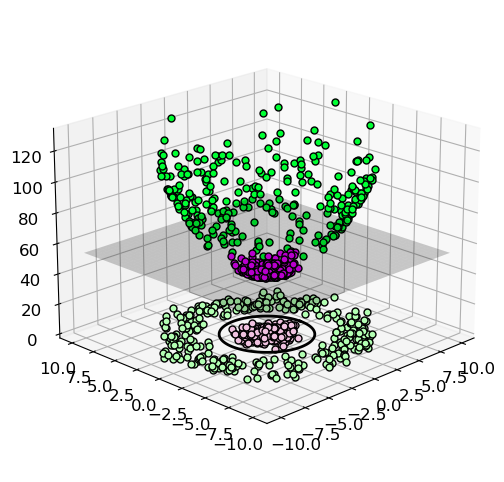

In [13]:
r = 7 + np.random.randn(n1)
th = 2 * np.pi * np.random.randn(n1)
xr = r * np.cos(th)
yr = r * np.sin(th)
x5 = np.random.randn(n1)
y5 = np.random.randn(n1)

zr = np.power(xr,2) + np.power(yr,2)
z5 = np.power(x5,2) + np.power(y5,2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, -135)

ax.plot(xr,yr,zr+40,'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=5)
ax.plot(x5,y5,z5+40,'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=5)


x = np.arange(-10,10.5,0.5)
y = x
X,Y = np.meshgrid(x,y)
F3 = 54 + 0*X + 0*Y

ax.plot_surface(X, Y, F3, cmap='gray',linewidth=0, antialiased=True,alpha=0.2)

ax.plot(xr,yr,np.zeros(*xr.shape),'ro',markerfacecolor=(179/255,1,179/255),markeredgecolor='k',ms=5)
ax.plot(x5,y5,np.zeros(*x5.shape),'bo',markerfacecolor=(240/255,194/255,224/255),markeredgecolor='k',ms=5)

theta = np.linspace(0,2*np.pi,100)
xrr = np.sqrt(14)*np.cos(theta)
yrr = np.sqrt(14)*np.sin(theta)

ax.plot(xrr,yrr,np.zeros(*xrr.shape),'k-',linewidth=2)

plt.show()